In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append("..")

In [5]:
from rom_tools.rom_manager import RomManager
from world_rando.parse_rules import parse_rules, make_level_from_room
from world_rando.coord import Coord

In [6]:
from data_types.item_set import ItemSet

In [7]:
manager = RomManager("../../roms/sm_clean.smc", "../../roms/sm_junk.smc")
obj_names = manager.parse() # slow
header = obj_names["room_header_0x79e9f"]
level = make_level_from_room(header)

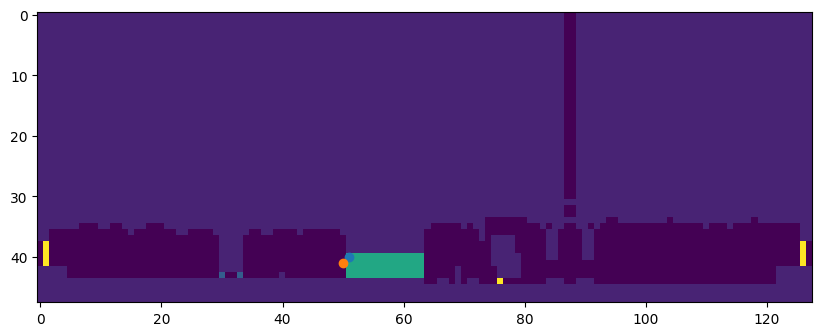

In [8]:
figure(figsize=(10,10));
scatter(51,40)
scatter(50,41)
imshow(level.level.T);

In [9]:
rules, tests = parse_rules(["../encoding/rules/rules.yaml"])
start_state = tests['TestWalk'][0]
start_state.level = level
start_state.level.liquid_level = 256
start_state.samus.position = Coord(50,41)

In [10]:
start_state.samus

(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))

In [11]:
next_state = rules["Step"].apply(start_state, debug=True)[0]

Applying Rule: Step
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))
Collided
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))
New:
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))


In [12]:
#TODO: get SearchState.copy() working
_, tests2 = parse_rules(["../encoding/rules/rules.yaml"])
start_state2 = tests2['TestWalk'][0]
start_state2.level = level
start_state2.level.liquid_level = 256
start_state2.samus.position = Coord(50,41)
start_state2.samus.items = start_state.samus.items | ItemSet(["MB", "PB"])

In [13]:
next_state2 = rules["Step"].apply(start_state2, debug=True)[0]

Applying Rule: Step
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet(['PB', 'MB']))
New:
(c(51,41)|V: 0, H: RUN, 0|STAND|ISet(['PB', 'MB']))


In [14]:
type(next_state.samus.velocity)

world_rando.rules.Velocity

In [15]:
vf = rules["Step"].state_function.vfunction

In [16]:
vf.as_tla()

VClauses(domain='((vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1)))', vv='vv_next = 0 + 0', vh='vh_next = 0 + 0', vt='vt_next = 1')

In [17]:
vf.domain.as_tla()

'(vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1))'

In [18]:
step = rules["Step"]

In [19]:
step.state_function.as_tla(start_state.samus.position, level.items)

SFClauses(pos_prev='(x_prev = 50 & y_prev = 41)', pos_next='(x_next = 51 & y_next = 41)', pose_prev='pose_prev = 0', pose_next='pose_next = 0', item='items_unchanged', vel=VClauses(domain='((vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1)))', vv='vv_next = 0 + 0', vh='vh_next = 0 + 0', vt='vt_next = 1'))

In [20]:
213 * 6000 * len(rules)

60066000

In [21]:
from world_rando.rules import *

In [22]:
tla_tile_clause(level, Coord(0,0), Coord(0,0), AbstractTile.SOLID)

''

In [23]:
get_tile(level, Coord(0,0), Coord(51,41))

7

In [24]:
tla_tile_clause(level, Coord(0,0), Coord(51,41), AbstractTile.AIR)

'(PB_prev = 1 & MB_prev = 1)'

In [25]:
block_solid_requirements

{<AbstractTile.SOLID: 2>: [(<world_rando.rules.VelocitySet at 0x7f3a4d331d80>,
   ISet([]),
   {<SamusPose.STAND: 0>,
    <SamusPose.MORPH: 1>,
    <SamusPose.JUMP: 2>,
    <SamusPose.SPIN: 3>})],
 <AbstractTile.BLOCK_CRUMBLE: 10>: 'Reciprocal',
 <AbstractTile.BLOCK_SHOT: 11>: [(<world_rando.rules.VelocitySet at 0x7f3a4d331d80>,
   ISet([]),
   {<SamusPose.STAND: 0>,
    <SamusPose.MORPH: 1>,
    <SamusPose.JUMP: 2>,
    <SamusPose.SPIN: 3>})]}

In [26]:
p = Coord(50,41)
o = Coord(0,0)
samus_occupies_air_tla(p, SamusPose.STAND, o, level)

''

In [27]:
#step.as_tla(start_state.samus.position, level.items)

In [28]:
rules["Step"].level_transition.state_list
# IntermediateState
#  pos: Coord
#  walls: [coord]
#  airs: [Coord]
#  samusfunction: Option(Samusfunction)

In [29]:
# conflict_ds: Direction -> Clause
#   Clause describes necessary prior conditions
# collide_outcomes -> [(Clause, Pos, Pose)]
#   Clause describes necessary outcomes

In [30]:
#item_c

In [31]:
fall0 = rules["Fall0"]
fall1 = rules["Fall1"]
pp = Coord(100,41)

In [32]:
fall0e = fall0.level_transition.as_tla(pp, level, debug=True)

Iteration 0
c(100,41)
(x_next = 100 & y_next = 41)
Walls: []
Airs: [(c(1,0), [c(1,0), c(1,1), c(1,2)]), (c(0,1), [])]
['', '']
{}
Iteration 1
c(101,41)
(x_next = 101 & y_next = 41)
Walls: []
Airs: [(c(1,0), []), (c(0,1), [])]
['', '', '', '']
{}
Outcomes:
Outcome 0: ((x_next = 101 & y_next = 41) & pose_next = 2 & ((vv_next = vv_prev + 1 | vv_prev = 1 & vv_next = 1) & vh_next = 0 + 0 & vt_next = 1))


In [33]:
sf_clauses = step.state_function.as_tla(p, level.items)
pos_prev_c, pos_next_c, pose_prev_c, pose_next_c, item_c, v_clauses = sf_clauses
domain_c, vv_c, vh_c, vt_c = v_clauses

In [34]:
expr = step.level_transition.as_tla(p, level, debug=True)

Iteration 0
c(50,41)
(x_next = 50 & y_next = 41)
Walls: [c(0,3)]
Airs: [(c(1,0), [c(1,0), c(1,1), c(1,2)]), (c(0,1), [])]
['', '']
{c(1,0): '(~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))'}
Iteration 1
c(51,41)
(x_next = 51 & y_next = 41)
Walls: [c(0,3)]
Airs: [(c(1,0), []), (c(0,1), [])]
['', '', '~((~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1))))', '((PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1))', '']
{}
Outcomes:
Outcome 0: ((x_next = 50 & y_next = 41) & pose_next = 0 & (vt_next = 1 & vh_next = 0 & vv_next = 0 + 0 & (~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))))
Outcome 1: ((x_next = 51 & y_next = 41) & pose_next = 0 & (vv_next = 0 + 0 & vh_next = 0 + 0 & vt_next = 1) & (~((~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))) & ((PB_prev = 1

In [35]:
expr

'((x_prev = 50 & y_prev = 41) & pose_prev = 0 & ((vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1))) & items_unchanged) & (((x_next = 50 & y_next = 41) & pose_next = 0 & (vt_next = 1 & vh_next = 0 & vv_next = 0 + 0 & (~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1))))) | ((x_next = 51 & y_next = 41) & pose_next = 0 & (vv_next = 0 + 0 & vh_next = 0 + 0 & vt_next = 1) & (~((~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))) & ((PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1)))))'

In [36]:
from data_types.item_set import item_mapping

In [37]:
rule_name_ids = {r:i for i,r in enumerate(rules.keys())}
pose_ids = {p:i for i,p in enumerate(SamusPose)}

In [38]:
def mk_replace(context, before, after):
    replace_dict = {}
    for k in context.vars.keys():
        if k.endswith(before):
            replace_dict[k] = k.replace(before, after)
    return replace_dict

In [39]:
# ITE(tile_reach(x,y),tile_reach(x,y),node_reach(x,y)) 
# node_reach
# TLA for node_reach

In [41]:
from omega.symbolic.fol import Context

In [42]:
context = Context()
context.declare(
    room_id_prev = (0,0xffff),
    room_id_next = (0,0xffff),
    
    rule = (0,len(rules.keys())-1),

    x_prev = (0,level.shape[0]-1),
    x_next = (0,level.shape[0]-1),

    y_prev = (0,level.shape[1]-1),
    y_next = (0,level.shape[1]-1),

    pose_prev = (0,len(SamusPose)-1),
    pose_next = (0,len(SamusPose)-1),
    
    vt_prev = (0, len(VType)),
    vt_next = (0, len(VType)),
    
    vh_prev = (-30, 30),
    vh_next = (-30, 30),
    
    vv_prev = (-15, 1),
    vv_next = (-15, 1),
)
# Try to get a favorable variable ordering
shared_dict = {}
for i in item_mapping:
    shared_dict[f"{i}_prev"] = (0,1)
    shared_dict[f"{i}_next"] = (0,1)
context.declare(**shared_dict)

In [43]:
def translate_iset(itemset, fstr="{}"):
    d = {}
    for i in item_mapping:
        if i in itemset:
            d[fstr.format(i)] = 1
        #else:
        #  d[fstr.format(i)] = 0
    return d

In [44]:
#context.vars

In [45]:
trans_test = context.false

In [48]:
trans_test |= context.add_expr(expr)

AssertionError: "items_unchanged" neither var nor operator

In [49]:
trans_test.count()

0.0

In [50]:
all_xys = ["x_prev", "y_prev", "x_next", "y_next"]
nonxy_vars = list(filter(lambda x: x != "x_prev" and x != "y_prev", context.vars.keys()))
nonxy_vars2 = list(filter(lambda x: x != "x_next" and x != "y_next", context.vars.keys()))
nonxy_vars3 = list(filter(lambda x: x not in all_xys, context.vars.keys()))

In [51]:
posns = context.exist(nonxy_vars2, trans_test)

In [52]:
model_posns = [(a["x_next"], -a["y_next"]) for a in context.pick_iter(posns)]

In [53]:
context.define(mk_items_unchanged())

In [54]:
model_posns

[]

In [55]:
## The big loop

In [56]:
import itertools

In [58]:
from tqdm.notebook import tqdm

In [59]:
def mk_trans(room_header):
    level = make_level_from_room(room_header)
    trans = context.false
    addr = int(room_header.old_address) & 0xffff
    room_same = context.add_expr(f"room_id_prev = {addr} & room_id_next = {addr}")
    for i,(x,y) in tqdm(enumerate(itertools.product(range(level.shape[0]), range(level.shape[1]))), total=level.shape[0] * level.shape[1]):
        c = Coord(x, y)
        for name, rule in rules.items():
            #print(c, name)
            expr = rule.level_transition.as_tla(c, level)
            if expr:
                #print(c, name)
                #print(expr)
                #TODO: context.define(items_unchanged)
                #TODO: pass context to as_tla and produce a BDD
                expr_bdd = context.add_expr(expr, with_ops=True)
                #print(f"Expr: {expr_bdd.count()}")
                #print(f"Room Same: {room_same.count()}")
                #print(f"Combined: {(expr_bdd & room_same).count()}")
                trans |= (expr_bdd & room_same)
    return trans

In [60]:
trans = mk_trans(header)

  0%|          | 0/6144 [00:00<?, ?it/s]

In [62]:
trans.count(), trans.dag_size

(2070483474317312.0, 2969)

In [63]:
posns = context.exist(nonxy_vars, trans)

In [64]:
model_posns = [(a["x_prev"], -a["y_prev"]) for a in context.pick_iter(posns)]

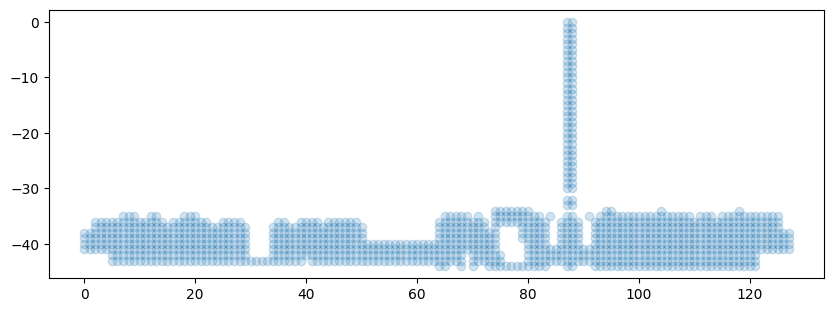

In [65]:
figure(figsize=(10,10))
scatter(*array(model_posns).T, alpha=0.2)
gca().set_aspect('equal');

In [66]:
rule_name_ids

{'Step': 0,
 'Step_hf': 1,
 'StepUp': 2,
 'StepUp_hf': 3,
 'StepDown': 4,
 'StepDown_hf': 5,
 'Morph': 6,
 'Unmorph': 7,
 'MorphStep': 8,
 'MorphStep_hf': 9,
 'BombJump': 10,
 'MorphFallOff': 11,
 'MorphFallOff_hf': 12,
 'MorphFall0': 13,
 'MorphFall0_hf': 14,
 'MorphFall1': 15,
 'MorphLand': 16,
 'GetItemMorph': 17,
 'GetItemMorph_hf': 18,
 'GetItem0': 19,
 'GetItem0_hf': 20,
 'GetItem1': 21,
 'GetItem1_hf': 22,
 'GetItem2': 23,
 'GetItem2_hf': 24,
 'GetItem0J': 25,
 'GetItem0J_hf': 26,
 'GetItem1J': 27,
 'GetItem1J_hf': 28,
 'GetItem2J': 29,
 'GetItem2J_hf': 30,
 'Jump': 31,
 'Jump_hf': 32,
 'JumpRight': 33,
 'JumpRight_hf': 34,
 'FallOff': 35,
 'FallOff_hf': 36,
 'Fall0': 37,
 'Fall0_hf': 38,
 'Fall1': 39,
 'SpinFall0': 40,
 'SpinFall0_hf': 41,
 'SpinFall1': 42,
 'Land': 43,
 'Land_hf': 44,
 'SpinLand': 45,
 'SpinLand_hf': 46}

In [67]:
## Composing trans with itself
context2 = Context()
context2.declare(
    room_id_prev = (0,0xffff),
    room_id_next = (0,0xffff),
    room_id_temp = (0,0xffff),

    x_prev = (0,level.shape[0]-1),
    x_next = (0,level.shape[0]-1),
    x_temp = (0,level.shape[0]-1),

    y_prev = (0,level.shape[1]-1),
    y_next = (0,level.shape[1]-1),
    y_temp = (0,level.shape[1]-1),

    pose_prev = (0,len(SamusPose)-1),
    pose_next = (0,len(SamusPose)-1),
    pose_temp = (0,len(SamusPose)-1),
    
    vt_prev = (0, len(VType)),
    vt_next = (0, len(VType)),
    vt_temp = (0, len(VType)),
    
    vh_prev = (-30, 30),
    vh_next = (-30, 30),
    vh_temp = (-30, 30),
    
    vv_prev = (-15, 1),
    vv_next = (-15, 1),
    vv_temp = (-15, 1),
)
# Try to get a favorable variable ordering
shared_dict = {}
for i in item_mapping:
    shared_dict[f"{i}_prev"] = (0,1)
    shared_dict[f"{i}_next"] = (0,1)
    shared_dict[f"{i}_temp"] = (0,1)
context2.declare(**shared_dict)

In [68]:
# Project over "rule" since many different rules will be used in the transitive closure
trans_norule = context.copy(context.exist(["rule"], trans), context2)

In [69]:
# Have: trans(prev, next)
# Want: trans(temp, next)
# Have: closure(prev, next)
# Want: closure(prev, temp)
prev_to_temp = mk_replace(context2, "prev", "temp")
next_to_temp = mk_replace(context2, "next", "temp")
temps = [k for k in context2.vars.keys() if k.endswith("_temp")]

In [70]:
# Iterative squaring
def mk_closure(trans_norule):
    n = 0
    closure = trans_norule
    closure_last = context2.false
    while closure != closure_last:
        closure_last = closure
        closure_prev_temp = context2.let(next_to_temp, closure_last)
        closure_temp_next = context2.let(prev_to_temp, closure_last)
        closure |= context2.exist(temps, closure_prev_temp & closure_temp_next)
        print(n, closure.dag_size)
        n+=1
    closure_square = closure
    return closure_square

In [76]:
closure = mk_closure(trans_norule)

0 24092
1 33340
2 42158
3 44505
4 44290
5 44981
6 31518
7 26507
8 26507


In [77]:
x_expr = closure & context2.add_expr("x_prev = 64 & y_prev = 42 & pose_prev = 0 & MB_prev = 1 & PB_prev = 1")
nexts = [k for k in context2.vars.keys() if k.endswith("_next")]
prevs = [k for k in context2.vars.keys() if k.endswith("_prev")]
xx = context2.pick(context2.exist(nexts, x_expr), prevs)

In [78]:
xx

{'room_id_prev': 40607,
 'x_prev': 64,
 'y_prev': 42,
 'pose_prev': 0,
 'vt_prev': 1,
 'vh_prev': 0,
 'vv_prev': 0,
 'B_prev': 0,
 'PB_prev': 1,
 'SPB_prev': 0,
 'S_prev': 0,
 'M_prev': 0,
 'G_prev': 0,
 'SA_prev': 0,
 'V_prev': 0,
 'GS_prev': 0,
 'SB_prev': 0,
 'HJ_prev': 0,
 'MB_prev': 1,
 'CB_prev': 0,
 'WB_prev': 0,
 'E_prev': 0,
 'PLB_prev': 0,
 'Spazer_prev': 0,
 'RT_prev': 0,
 'XR_prev': 0,
 'IB_prev': 0,
 'SJ_prev': 0,
 'Kraid_prev': 0,
 'Phantoon_prev': 0,
 'Draygon_prev': 0,
 'Ridley_prev': 0,
 'Botwoon_prev': 0,
 'Spore_Spawn_prev': 0,
 'Golden_Torizo_prev': 0,
 'Bomb_Torizo_prev': 0,
 'Mother_Brain_prev': 0,
 'Crocomire_prev': 0,
 'Ceres_Ridley_prev': 0,
 'Drain_prev': 0,
 'Shaktool_prev': 0,
 'START_prev': 0,
 'Statues_prev': 0}

In [79]:
xx_bdd = context2.assign_from(xx)
reachable = xx_bdd & closure
reachable.count()
model_posns = [(a["x_next"], -a["y_next"]) for a in context2.pick_iter(reachable)]

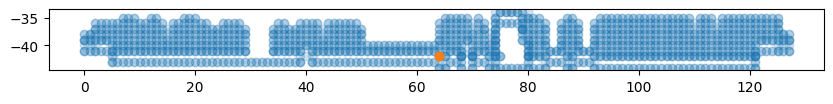

In [80]:
figure(figsize=(10,10))
scatter(*array(model_posns).T, alpha=0.2)
scatter(64,-42)
gca().set_aspect('equal');

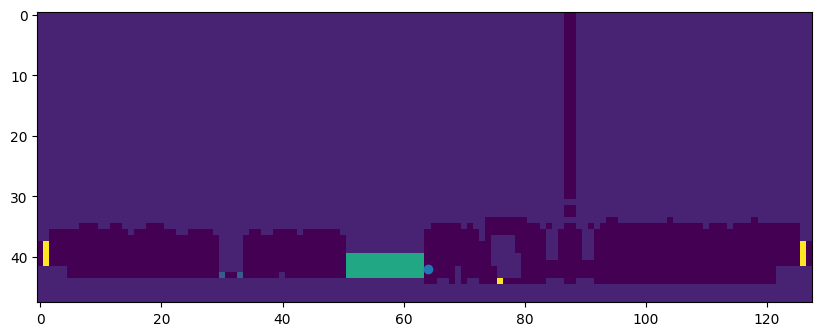

In [81]:
figure(figsize=(10,10))
imshow(level.level.T);
scatter(64,42)

In [82]:
#TODO: Debug falling rule

In [83]:
construction_zone = obj_names["room_header_0x79e9f"].door_list.l[1].to_room
missiles_room = construction_zone.door_list.l[2].to_room

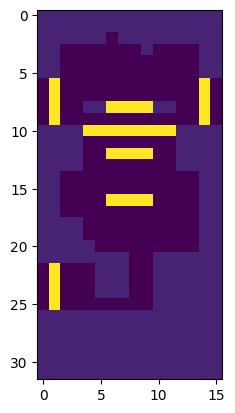

In [84]:
imshow(make_level_from_room(construction_zone).level.T)

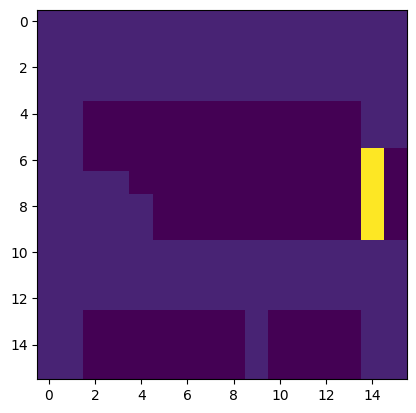

In [85]:
imshow(make_level_from_room(missiles_room).level.T)

In [86]:
sys.getrecursionlimit()

3000

In [87]:
#TODO: declare a context large enough that all possible door transitions work (x_prev and x_next must be within the bounds)
with open("../output/tla/doors.tla") as f:
    s = f.read()
    door_trans = context.add_expr(s)

In [88]:
door_trans.count()

15049565405184.0

In [89]:
i = context.pick_iter(context.exist(nonxy_vars3, door_trans))

In [90]:
all_doors = []
for j in i:
    all_doors.append(j)

In [91]:
len(all_doors) # (Should be 255, but some doors are past the xy limits)

171

In [92]:
# Displaying the combined graph
# 6144 3:31
# 512 0:51
# 256 0:20
# 6912 282

In [147]:
compute_rooms = [construction_zone, missiles_room]

In [163]:
transes = [mk_trans(r) for r in compute_rooms]

  0%|          | 0/512 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

In [174]:
norule_transes = [context.copy(context.exist(["rule"], trans), context_policy) for trans in transes]

In [175]:
policies = [mk_policy(nrt) for nrt in norule_transes]

0 2121 7050 4585
1 3895 9034 8372
2 6047 11290 12693
3 8478 13812 17815
4 11096 16598 23292
5 13940 19575 28987
6 16660 22414 35269
7 19176 25063 41488
8 21301 27312 47158
9 23335 29390 52274
10 25363 31462 57072
11 27255 33366 61981
12 28798 34926 66447
13 29908 36058 70518
14 30776 36934 73898
15 31349 37504 76404
16 31508 37698 78254
17 31295 37523 79433
18 30926 37145 80081
19 30237 36459 80423
20 29265 35474 80190
21 28125 34319 79331
22 26708 32865 77949
23 25085 31205 76229
24 23382 29485 73908
25 21708 27785 71770
26 20007 26071 69472
27 18430 24487 67244
28 17092 23152 65184
29 15948 22011 63459
30 15004 21069 62113
31 14141 20207 60861
32 13434 19500 59910
33 12908 18974 59125
34 12441 18507 58439
35 12025 18091 57764
36 11619 17685 57070
37 11263 17329 56423
38 10949 17015 55838
39 10753 16819 55495
40 10709 16775 55439
41 10709 16775 55439
0 1256 6119 2497
1 1917 6865 3858
2 2580 7598 5445
3 3250 8305 7182
4 3881 9059 8889
5 4461 9715 10564
6 5068 10360 12231
7 5606 10955 1

In [179]:
goal_to_next = mk_replace(context_policy, "goal", "next")

In [180]:
room_summary_transes = [context_policy.let(goal_to_next, context_policy.exist(nexts, p)) for p in policies]

In [184]:
door_trans2 = mk_door_trans_for_rooms(door_trans, compute_rooms)
door_trans2 = context2.copy(door_trans2, context_policy)

In [182]:
all_trans = context_policy.false
for trans in room_summary_transes:
    all_trans |= trans
all_trans |= door_trans2

In [186]:
global_policy = mk_policy(all_trans)

0 15086 19973 57976
1 16568 23369 66241
2 23527 30486 91797
3 27795 35002 117547
4 27685 34900 128948
5 26973 34190 129516
6 26974 34201 129619
7 26974 34201 129619


In [ ]:
## Find a path

In [250]:
task_expr = context_policy.add_expr("M_prev < M_goal & room_id_prev = 40721 & room_id_goal = 40721 & x_prev = 12")
# Concrete task
task = context_policy.exist(nexts, global_policy & task_expr).pick()
task_bdd = context_policy.bdd.cube(task)

In [251]:
# Get a symbolic path (all optimal solutions at once)
path = task_bdd
for i in range(50):
    # Path(prev, goal)
    # path(next, goal) = exists prev st. path(prev, goal) & policy(prev, next, goal)
    #follow_policy = context_policy.exist(prevs, path & policy)
    follow_policy = context_policy.exist(prevs, path & global_policy)
    path |= context_policy.let(next_to_prev, follow_policy)

In [252]:
path.count()

66.0

In [253]:
keep_vars = ["x_prev", "y_prev", "room_id_prev", "x_next", "y_next", "room_id_next", "M_prev", "M_next"]
exist_vars = list(filter(lambda x: x not in keep_vars, context_policy.vars.keys()))
current_state = context_policy.exist(goals, task_bdd)
goal_bdd = context_policy.exist(prevs, task_bdd)
while True:
    next_state_bdd = context_policy.assign_from(context_policy.pick(context_policy.exist(prevs, current_state & global_policy & goal_bdd)))
    print()
    print(context_policy.pick(context_policy.exist(exist_vars, current_state)))
    print(context_policy.pick(context_policy.exist(exist_vars, next_state_bdd)))
    current_state = context_policy.let(next_to_prev, next_state_bdd)
    if (goal_satisfied & next_state_bdd).count() > 0:
        break
    #TODO Find the within-room path for each step
    #TODO Combine tile-level within-rooms with global policy
    # Granularity var
    # Granularity = 0 & global_policy
    # Granularity = 1 & [local_policy]
    # low-level paths with Granularity = 1 & all_policy & current_state & next_state_bdd


{'room_id_prev': 40721, 'x_prev': 12, 'y_prev': 8, 'M_prev': 0}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 23, 'M_next': 0}

{'room_id_prev': 40721, 'x_prev': 0, 'y_prev': 23, 'M_prev': 0}
{'room_id_next': 41223, 'x_next': 15, 'y_next': 7, 'M_next': 0}

{'room_id_prev': 41223, 'x_prev': 15, 'y_prev': 7, 'M_prev': 0}
{'room_id_next': 41223, 'x_next': 15, 'y_next': 7, 'M_next': 1}

{'room_id_prev': 41223, 'x_prev': 15, 'y_prev': 7, 'M_prev': 1}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 23, 'M_next': 1}


In [224]:
pp = get_all_posns(path, addr_offsets)
#pp = get_all_posns(construction_trans, addr_offsets)
figure(figsize=(10,10))
scatter(*array(pp).T)
gca().set_aspect('equal');

KeyError: 'room_id_next'

In [216]:
pp

[(463, -647), (464, -647)]

In [166]:
#closures = [mk_closure(nrt) for nrt in norule_transes]

In [ ]:
construction_trans = transes[0]
missiles_trans = transes[1]

In [151]:
def room_addr_tla(room_header):
    return f"room_id_prev = {int(room_header.old_address) & 0xffff}"

# Restrict door_trans a certain set of rooms
def mk_door_trans_for_rooms(door_trans, rooms):
    room_restriction = context.add_expr(" | ".join([room_addr_tla(r) for r in rooms]))
    return door_trans & room_restriction

In [152]:
door_trans2 = mk_door_trans_for_rooms(door_trans, compute_rooms)

In [154]:
all_trans = context.false
for trans in transes:
    all_trans |= trans
all_trans |= door_trans2

In [155]:
all_trans.count()

5.902967936313385e+20

In [156]:
from abstraction_validation.abstractify import area_offsets

In [157]:
def get_room_offset(room_header):
    area_pos = area_offsets[room_header.area_index]
    room_map_pos = Coord(room_header.map_x, room_header.map_y)
    return (area_pos + room_map_pos).scale(16)

In [158]:
offsets = [get_room_offset(r) for r in compute_rooms]

In [159]:
addr_offsets = {int(r.old_address) & 0xffff: get_room_offset(r) for r in compute_rooms} 

In [223]:
# def get_all_posns(compute_rooms):
#     all_posns = []
#     for room in compute_rooms:
#         offset = get_room_offset(room)
#         print(offset)
#         print(room_addr_tla(room))
#         bb = all_trans & context.add_expr(room_addr_tla(room))
#         posns = context.exist(nonxy_vars, bb)
#         model_posns = [(a["x_prev"] + offset.x, -a["y_prev"] - offset.y) for a in context.pick_iter(posns)]
#         all_posns.extend(model_posns)
#     return all_posns

keep_vars = ["x_prev", "y_prev", "room_id_prev", "x_next", "y_next", "room_id_next"]
exist_vars = list(filter(lambda x: x not in keep_vars, context_policy.vars.keys()))

def get_all_posns(all_trans, addr_offsets):
    all_posns = []
    #context = all_trans.manager
    posns = context_policy.exist(exist_vars, all_trans)
    model_posns = []
    for a in context_policy.pick_iter(posns):
        offset = addr_offsets[a["room_id_prev"]]
        model_posns.append((a["x_prev"] + offset.x, -a["y_prev"] - offset.y))
        offset = addr_offsets[a["room_id_next"]]
        model_posns.append((a["x_next"] + offset.x, -a["y_next"] - offset.y))
    return model_posns

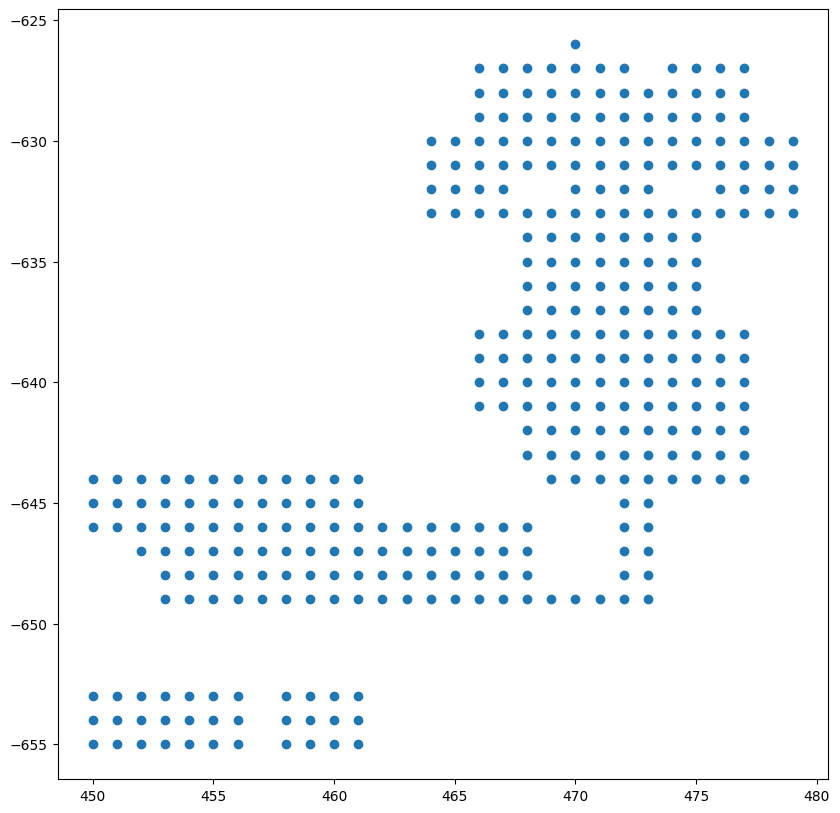

In [161]:
pp = get_all_posns(all_trans, addr_offsets)
#pp = get_all_posns(construction_trans, addr_offsets)
figure(figsize=(10,10))
scatter(*array(pp).T)
gca().set_aspect('equal');

In [86]:
context.op

{'x_text': '( x_prev = 7 )', 'x_text2': '( x_prev = 7 )'}

In [87]:
context.add_expr("x_text", with_ops=True)

In [94]:
## Policies

In [98]:
## Composing trans with itself
context_policy = Context()
context_policy.declare(
    room_id_prev = (0,0xffff),
    room_id_next = (0,0xffff),
    room_id_goal = (0,0xffff),

    x_prev = (0,level.shape[0]-1),
    x_next = (0,level.shape[0]-1),
    x_goal = (0,level.shape[0]-1),

    y_prev = (0,level.shape[1]-1),
    y_next = (0,level.shape[1]-1),
    y_goal = (0,level.shape[1]-1),

    pose_prev = (0,len(SamusPose)-1),
    pose_next = (0,len(SamusPose)-1),
    pose_goal = (0,len(SamusPose)-1),
    
    vt_prev = (0, len(VType)),
    vt_next = (0, len(VType)),
    vt_goal = (0, len(VType)),
    
    vh_prev = (-30, 30),
    vh_next = (-30, 30),
    vh_goal = (-30, 30),
    
    vv_prev = (-15, 1),
    vv_next = (-15, 1),
    vv_goal = (-15, 1),
)
# Try to get a favorable variable ordering
shared_dict = {}
for i in item_mapping:
    shared_dict[f"{i}_prev"] = (0,1)
    shared_dict[f"{i}_next"] = (0,1)
    shared_dict[f"{i}_goal"] = (0,1)
context_policy.declare(**shared_dict)

In [99]:
# Project over "rule" since many different rules will be used in the transitive closure
trans_policy = context.copy(context.exist(["rule"], trans), context_policy)

In [100]:
nexts = [k for k in context_policy.vars.keys() if k.endswith("_next")]
prevs = [k for k in context_policy.vars.keys() if k.endswith("_prev")]
goals = [k for k in context_policy.vars.keys() if k.endswith("_goal")]

In [101]:
goal_satisfied = context_policy.true
for v1, v2 in zip(nexts, goals):
    sat = context_policy.add_expr(f"{v1} = {v2}")
    #print(sat.dag_size)
    #print(goal_satisfied.dag_size)
    goal_satisfied &= sat

In [172]:
# covered = goal_satisfied
# while covered keeps changing:
#   covered |= exist prev s.t. covered(next, goal) and trans(prev, next)
def mk_policy(trans_norule):
    prev_to_next = mk_replace(context_policy, "prev", "next")
    next_to_prev = mk_replace(context_policy, "next", "prev")
    n = 0
    # prev, next, goal
    policy = context_policy.false
    covered = goal_satisfied
    covered_last = context_policy.false
    while covered != covered_last:
        # States with edges into a covered state
        covered_last = covered
        covered_temp = context_policy.exist(nexts, trans_norule & covered)
        covered_temp = context_policy.let(prev_to_next, covered_temp)
        # policy(prev, next, goal) = trans(prev, next) & covered(next, goal) & ~covered(prev, goal)
        covered_prev_goal = context_policy.let(next_to_prev, covered)
        policy |= trans_norule & covered & ~covered_prev_goal
        # Find a state in covered that the fringe state transitions to
        covered |= covered_temp
        print(n, covered_temp.dag_size, covered.dag_size, policy.dag_size)
        n += 1
    return policy

In [104]:
policy = mk_policy(trans_policy)

0 2481 3141 4083
1 4403 5119 8682
2 6810 7536 14858
3 10172 10958 23688
4 13598 14719 31162
5 17610 18838 41711
6 21118 23205 51865
7 25112 27289 62871
8 29165 31413 74122
9 32790 36026 68944
10 36368 39636 77153
11 39593 42858 85137
12 42569 45833 92636
13 45192 48460 99664
14 47588 50857 106341
15 49779 53033 112514
16 51776 55021 118188
17 53661 56905 123072
18 55403 58653 127458
19 49642 56153 110498
20 50630 57136 113036
21 51497 57996 115384
22 52424 58922 117711
23 53289 59793 119929
24 54221 60736 122156
25 55078 61598 124306
26 55680 62208 125900
27 56323 62854 127328
28 56942 63460 128874
29 57623 64138 130513
30 58261 64760 132098
31 58890 65389 133594
32 59566 66069 135099
33 60214 66720 136563
34 60782 67287 137787
35 61164 67671 138743
36 61495 68026 139544
37 61887 68463 140500
38 62220 68836 141331
39 62525 69178 142360
40 62885 69539 143429
41 63254 69923 144416
42 63664 70352 145435
43 63803 70496 146252
44 63759 70473 146998
45 63745 70483 147575
46 63599 70354 14813

In [105]:
nonxy_vars = list(filter(lambda x: x != "x_next" and x != "y_next", context_policy.vars.keys()))

In [ ]:
policy_posns = context_policy.exist(nonxy_vars, trans_policy)

In [132]:
policy_posns = [(a["x_next"], -a["y_next"]) for a in context_policy.pick_iter(policy_posns)]

In [145]:
## Determinizing Policy

In [107]:
from omega.symbolic.functions import make_functions

In [114]:
bits = context_policy.exist(prevs + goals, policy).support

In [117]:
fns = make_functions(policy, bits, policy.bdd)
deterministic_policy = context_policy.bdd.add_expr(f"&".join([f"({k} <-> {v['function']})" for k,v in fns.items()]))

In [125]:
start_expr = context_policy.add_expr("x_prev = 64 & y_prev = 42 & MB_prev = 0 & pose_prev = 0")

In [126]:
goal_expr = context_policy.add_expr("x_goal = 125 & y_goal = 39 & pose_goal = 0")

In [127]:
# Concrete task
task = context_policy.exist(nexts, start_expr & policy & goal_expr).pick()

In [128]:
task_bdd = context_policy.bdd.cube(task)

In [142]:
# Get a symbolic path (all optimal solutions at once)
path = task_bdd
for i in range(50):
    # Path(prev, goal)
    # path(next, goal) = exists prev st. path(prev, goal) & policy(prev, next, goal)
    #follow_policy = context_policy.exist(prevs, path & policy)
    follow_policy = context_policy.exist(prevs, path & deterministic_policy)
    path |= context_policy.let(next_to_prev, follow_policy)

In [143]:
nonxy_vars = list(filter(lambda x: x != "x_prev" and x != "y_prev", context_policy.vars.keys()))
path_posns = context_policy.exist(nonxy_vars, path)
path_posns = [(a["x_prev"], -a["y_prev"]) for a in context_policy.pick_iter(path_posns)]

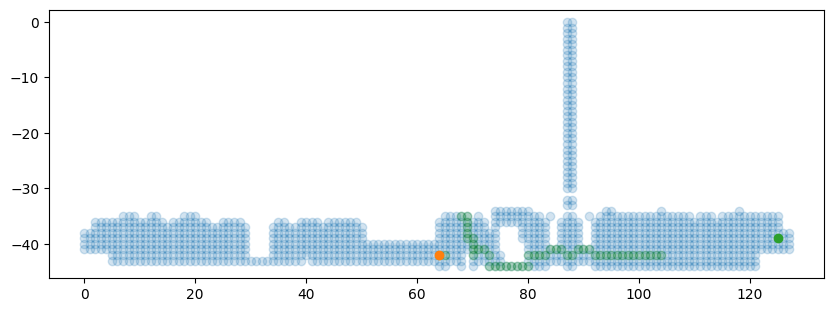

In [144]:
figure(figsize=(10,10))
scatter(*array(policy_posns).T, alpha=0.2)
scatter(*array(path_posns).T, alpha=0.2, c="green")
scatter(64,-42)
scatter(125,-39)
gca().set_aspect('equal');

In [146]:
## Multi-Room Policies

In [ ]:
# Get a concrete path
current = task_bdd.pick()
path = [current]
while True:
    #print(current)
    current_bdd = context_policy.bdd.cube(current)
    next_temp = context_policy.exist(prevs, current_bdd & policy)
    advice = context_policy.let(next_to_prev, next_temp)
    #print(advice.count())
    current = advice.pick()
    # Check whether the goal is satisfied in the state given by the advice.
    if (next_temp & goal_satisfied).pick():
    break
    path.append(current)